In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [657]:
train=pd.read_csv("train_IA_-_train.csv")
test=pd.read_csv("test_IA_-_test.csv")

In [658]:
train.shape,test.shape

((5800, 27), (1200, 26))

In [659]:
pd.set_option('display.max_columns',None)

In [660]:
train.head(3)

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88,106,41,66,42,47,13,15,6,Neutral,Neutral,98,37,No,Yes,Yes,Consider
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93,313,28,62,32,52,5,15,4,Neutral,Negative,54,33,No,No,Yes,Consider
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52,67,26,14,57,34,4,7,3,Positive,Positive,31,58,No,Yes,No,Consider


In [661]:
test

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask
0,702127796635,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes
1,613490569071,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes
2,759998772623,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes
3,391760082113,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes
4,941599210196,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,256033687434,1.299110e+09,193,Marketing,0.66,0.34,95,118,79,65,294.0,110,61,29,30.0,85,15,20.0,7.0,Positive,Negative,86.0,49,Yes,Yes,No
1196,627337316047,2.367087e+09,233,Data Scientist,0.66,0.34,42,47,107,57,54.0,140,35,33,51.0,76,8,18.0,2.0,Positive,Negative,32.0,32,No,Yes,No
1197,75547031851,4.401842e+09,214,HR,0.73,0.27,72,105,78,55,247.0,158,30,39,27.0,6,1,18.0,3.0,Negative,Negative,34.0,19,Yes,Yes,No
1198,173914777164,7.505289e+08,231,Developer,0.95,0.05,42,45,68,60,97.0,327,65,42,88.0,63,1,9.0,7.0,Positive,Negative,78.0,23,No,No,No


In [662]:
train["Status"].fillna(train["Status"].mode()[0],inplace=True)

In [663]:
train.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 1
P.E.C                 3
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     1
Candidate into        0
Opp to ask            1
Status                0
dtype: int64

In [664]:
test.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               1
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               1
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 2
S.P.C                 0
L.A.C                 0
L.A.I                 1
Q.A                   1
P.E.I                 2
P.E.C                 2
COMPLIANCE Ratio      1
Interview duration    0
Interviewer Intro     2
Candidate into        0
Opp to ask            0
dtype: int64

In [665]:
df=pd.concat([train,test])

In [666]:
#checking_unique_counts&presense of data
for i in df.columns:
    print(i,'\n')
    print(df[i].unique(),'\n')
    print(df[i].nunique(),'\n')

Interview Id 

[6.91302972e+11 9.21432644e+11 4.71883900e+10 ... 7.55470319e+10
 1.73914777e+11 4.80519602e+11] 

7000 

Candidate Id 

[2.65577413e+09 7.12384596e+08 8.44553340e+08 ... 4.40184170e+09
 7.50528917e+08 3.06520116e+09] 

7000 

Interviewer Id 

[194 234 267 199 221 246 228 197 250 213 266 190 208 257 247 253 214 258
 255 254 265 262 233 249 268 224 203 226 201 256 261 243 196 212 198 236
 216 263 259 206 210 192 195 218 244 252 205 202 264 241 235 215 191 229
 219 204 242 217 248 220 232 240 238 237 239 225 231 207 209 260 193 251
 230 222 227 211 245 223 200] 

79 

Profile 

['Developer' 'Sales' 'Program Manager' 'Marketing' 'QA Automation'
 'Account Manager' 'Data Scientist' 'Product Manager' 'QA Manual' 'HR'] 

10 

S.L.R.C 

[0.98 0.67 0.81 0.69 0.57 0.65 0.52 0.91 0.72 0.82 0.66 0.51 0.97 0.54
 0.55 0.5  0.79 0.83 0.73 0.63 0.62 0.88 0.8  0.99 0.68 0.85 0.84 0.7
 0.93 0.87 0.94 0.71 0.58 0.77 0.96 0.76 0.61 0.53 0.59 0.75 0.92 0.64
 0.95 0.56 0.89 0.86 0.6  0.78 0.7

In [667]:
df.isnull().sum()

Interview Id             0
Candidate Id             0
Interviewer Id           0
Profile                  0
S.L.R.C                  0
S.L.R.I                  1
A.T.T                    0
L.M.I                    0
L.M.C                    0
S.R                      0
L.J.T.C                  1
L.J.T.I                  0
N.I.C                    0
N.I.I                    0
S.P.I                    2
S.P.C                    0
L.A.C                    0
L.A.I                    1
Q.A                      1
P.E.I                    3
P.E.C                    5
COMPLIANCE Ratio         1
Interview duration       0
Interviewer Intro        3
Candidate into           0
Opp to ask               1
Status                1200
dtype: int64

In [668]:
#fill null values
df["P.E.I"].fillna(df["P.E.I"].mode()[0],inplace=True)
df["P.E.C"].fillna(df["P.E.C"].mode()[0],inplace=True)
df["Interviewer Intro"].fillna(df["Interviewer Intro"].mode()[0],inplace=True)
df["Opp to ask"].fillna(df["Opp to ask"].mode()[0],inplace=True)

In [669]:
#fill na values -test_data
df['S.L.R.I']=df['S.L.R.I'].fillna(df['S.L.R.I'].mean())
df['L.J.T.C'] =df['L.J.T.C'].fillna(df['L.J.T.C'].mean())
df['S.P.I']=df['S.P.I'].fillna(df['S.P.I'].mean())
df['L.A.I']=df['L.A.I'].fillna(df['L.A.I'].mean())
df['Q.A']=df['Q.A'].fillna(df['Q.A'].mean())
df['COMPLIANCE Ratio']=df['COMPLIANCE Ratio'].fillna(df['COMPLIANCE Ratio'].mean())

In [670]:
df.isnull().sum()

Interview Id             0
Candidate Id             0
Interviewer Id           0
Profile                  0
S.L.R.C                  0
S.L.R.I                  0
A.T.T                    0
L.M.I                    0
L.M.C                    0
S.R                      0
L.J.T.C                  0
L.J.T.I                  0
N.I.C                    0
N.I.I                    0
S.P.I                    0
S.P.C                    0
L.A.C                    0
L.A.I                    0
Q.A                      0
P.E.I                    0
P.E.C                    0
COMPLIANCE Ratio         0
Interview duration       0
Interviewer Intro        0
Candidate into           0
Opp to ask               0
Status                1200
dtype: int64

In [671]:
train=df[df['Status'].isnull()==False]
test=df[df['Status'].isnull()==True]

In [672]:
train.shape,test.shape

((5800, 27), (1200, 27))

In [673]:
test.head(6)

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status
0,7.021278e+11,2.381365e+09,229,Product Manager,0.52,0.48,103,53,77,30,26.0,287,8,22,69.0,88,5,19.0,4.0,Positive,Negative,24.0,49,Yes,Yes,Yes,NaN
1,6.134906e+11,8.428514e+08,194,Product Manager,0.87,0.13,54,57,57,68,179.0,253,62,40,47.0,81,1,9.0,7.0,Positive,Neutral,99.0,24,No,Yes,Yes,NaN
2,7.599988e+11,7.681665e+09,266,QA Automation,0.60,0.40,50,117,93,36,137.0,31,40,52,57.0,13,7,15.0,3.0,Negative,Positive,16.0,16,Yes,No,Yes,NaN
3,3.917601e+11,6.627808e+09,256,HR,0.52,0.48,102,114,66,31,176.0,242,69,66,59.0,10,10,4.0,6.0,Negative,Neutral,66.0,40,No,No,Yes,NaN
4,9.415992e+11,1.148634e+09,267,HR,0.59,0.41,96,73,115,23,218.0,215,69,42,74.0,20,10,4.0,6.0,Positive,Positive,47.0,38,No,Yes,Yes,NaN
5,3.789210e+11,8.826131e+09,264,Developer,0.88,0.12,23,87,115,59,246.0,518,59,65,25.0,46,11,13.0,5.0,Positive,Neutral,5.0,35,No,Yes,Yes,NaN


In [674]:
test=test.drop(columns='Status')

In [675]:
test.isnull().sum()

Interview Id          0
Candidate Id          0
Interviewer Id        0
Profile               0
S.L.R.C               0
S.L.R.I               0
A.T.T                 0
L.M.I                 0
L.M.C                 0
S.R                   0
L.J.T.C               0
L.J.T.I               0
N.I.C                 0
N.I.I                 0
S.P.I                 0
S.P.C                 0
L.A.C                 0
L.A.I                 0
Q.A                   0
P.E.I                 0
P.E.C                 0
COMPLIANCE Ratio      0
Interview duration    0
Interviewer Intro     0
Candidate into        0
Opp to ask            0
dtype: int64

In [676]:
#Convert ratio(t) ---minutes
def time_c(n):
    totalmins=n['S.L.R.C']*60
    mins=int(totalmins%60)
    return mins

In [677]:
def time_i(n):
    totalmins=n['S.L.R.I']*60
    mins=int(totalmins%60)
    return mins

In [678]:
train['S.L.T.C']=train.apply(time_c,axis=1)
train['S.L.T.I']=train.apply(time_i,axis=1)

C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\3924237814.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['S.L.T.C']=train.apply(time_c,axis=1)
C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\3924237814.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['S.L.T.I']=train.apply(time_i,axis=1)


In [679]:
test['S.L.T.C']=test.apply(time_c,axis=1)
test['S.L.T.I']=test.apply(time_i,axis=1)

In [680]:
train

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status,S.L.T.C,S.L.T.I
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88.0,106,41,66,42.0,47,13,15.0,6.0,Neutral,Neutral,98.0,37,No,Yes,Yes,Consider,58,1
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93.0,313,28,62,32.0,52,5,15.0,4.0,Neutral,Negative,54.0,33,No,No,Yes,Consider,40,19
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52.0,67,26,14,57.0,34,4,7.0,3.0,Positive,Positive,31.0,58,No,Yes,No,Consider,48,11
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115.0,166,62,55,65.0,75,10,10.0,7.0,Positive,Negative,24.0,35,No,Yes,No,Consider,41,18
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190.0,394,7,32,36.0,74,13,7.0,3.0,Negative,Positive,73.0,60,Yes,Yes,No,Consider,34,25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,3.186849e+11,7.483571e+09,192,Marketing,0.58,0.42,52,51,119,42,274.0,100,13,15,59.0,6,6,13.0,5.0,Negative,Neutral,16.0,25,Yes,Yes,No,Consider,34,25
5796,2.129354e+11,6.833534e+09,230,QA Manual,0.69,0.31,34,81,115,51,11.0,401,19,5,70.0,13,6,3.0,6.0,Positive,Negative,23.0,40,Yes,Yes,No,Consider,41,18
5797,8.850640e+11,4.657574e+09,253,Product Manager,0.64,0.36,58,58,43,42,143.0,240,59,63,79.0,77,3,19.0,3.0,Negative,Neutral,60.0,18,No,Yes,No,May Consider,38,21
5798,6.047461e+11,8.118565e+08,257,Sales,0.94,0.06,104,55,114,68,83.0,518,35,54,53.0,45,11,14.0,3.0,Neutral,Positive,61.0,43,Yes,Yes,Yes,Consider,56,3


In [681]:
#percentage of time duartions in MINS
mins=60
train['S.R.T']=round(train['S.R']*(mins/100))
train['L.A.I.T']=round(train['L.A.I']*(mins/100))
train['L.A.C.T']=round(train['L.A.C']*(mins/100))

C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\2023559361.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['S.R.T']=round(train['S.R']*(mins/100))
C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\2023559361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['L.A.I.T']=round(train['L.A.I']*(mins/100))
C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\2023559361.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_

In [682]:
mins=60
test['S.R.T']=round(test['S.R']*(mins/100))
test['L.A.I.T']=round(test['L.A.I']*(mins/100))
test['L.A.C.T']=round(test['L.A.C']*(mins/100))

In [683]:
#change into integer dtype
train["S.R.T"]=train["S.R.T"].astype(int)
train["L.A.I.T"]=train["L.A.I.T"].astype(int)
train["L.A.C.T"]=train["L.A.C.T"].astype(int)

C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\4084751649.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["S.R.T"]=train["S.R.T"].astype(int)
C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\4084751649.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["L.A.I.T"]=train["L.A.I.T"].astype(int)
C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\4084751649.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer]

In [684]:
test["S.R.T"]=test["S.R.T"].astype(int)
test["L.A.I.T"]=test["L.A.I.T"].astype(int)
test["L.A.C.T"]=test["L.A.C.T"].astype(int)

In [685]:
train

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status,S.L.T.C,S.L.T.I,S.R.T,L.A.I.T,L.A.C.T
0,6.913030e+11,2.655774e+09,194,Developer,0.98,0.02,53,88,93,32,88.0,106,41,66,42.0,47,13,15.0,6.0,Neutral,Neutral,98.0,37,No,Yes,Yes,Consider,58,1,19,9,8
1,9.214326e+11,7.123846e+08,234,Sales,0.67,0.33,51,53,44,36,93.0,313,28,62,32.0,52,5,15.0,4.0,Neutral,Negative,54.0,33,No,No,Yes,Consider,40,19,22,9,3
2,4.718839e+10,8.445533e+08,267,Program Manager,0.81,0.19,60,77,75,54,52.0,67,26,14,57.0,34,4,7.0,3.0,Positive,Positive,31.0,58,No,Yes,No,Consider,48,11,32,4,2
3,9.943741e+11,6.511106e+09,199,Marketing,0.69,0.31,93,42,103,49,115.0,166,62,55,65.0,75,10,10.0,7.0,Positive,Negative,24.0,35,No,Yes,No,Consider,41,18,29,6,6
4,3.509007e+11,3.487001e+09,221,QA Automation,0.57,0.43,44,44,119,66,190.0,394,7,32,36.0,74,13,7.0,3.0,Negative,Positive,73.0,60,Yes,Yes,No,Consider,34,25,40,4,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,3.186849e+11,7.483571e+09,192,Marketing,0.58,0.42,52,51,119,42,274.0,100,13,15,59.0,6,6,13.0,5.0,Negative,Neutral,16.0,25,Yes,Yes,No,Consider,34,25,25,8,4
5796,2.129354e+11,6.833534e+09,230,QA Manual,0.69,0.31,34,81,115,51,11.0,401,19,5,70.0,13,6,3.0,6.0,Positive,Negative,23.0,40,Yes,Yes,No,Consider,41,18,31,2,4
5797,8.850640e+11,4.657574e+09,253,Product Manager,0.64,0.36,58,58,43,42,143.0,240,59,63,79.0,77,3,19.0,3.0,Negative,Neutral,60.0,18,No,Yes,No,May Consider,38,21,25,11,2
5798,6.047461e+11,8.118565e+08,257,Sales,0.94,0.06,104,55,114,68,83.0,518,35,54,53.0,45,11,14.0,3.0,Neutral,Positive,61.0,43,Yes,Yes,Yes,Consider,56,3,41,8,7


In [686]:
#LabelEnoding
lbe=LabelEncoder()
train['Profile']=lbe.fit_transform(train['Profile'])
train['P.E.I']=lbe.fit_transform(train['P.E.I'])
train['P.E.C']=lbe.fit_transform(train['P.E.C'])
train['Interviewer Intro']=lbe.fit_transform(train['Interviewer Intro'])
train['Candidate Intro']=lbe.fit_transform(train['Candidate into'])
train['Opp to ask']=lbe.fit_transform(train['Opp to ask'])
train['Status']=lbe.fit_transform(train['Status'])

C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\4272071840.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Profile']=lbe.fit_transform(train['Profile'])
C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\4272071840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['P.E.I']=lbe.fit_transform(train['P.E.I'])
C:\Users\kamal\AppData\Local\Temp\ipykernel_14980\4272071840.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexe

In [687]:
test['Profile']=lbe.fit_transform(test['Profile'])
test['P.E.I']=lbe.fit_transform(test['P.E.I'])
test['P.E.C']=lbe.fit_transform(test['P.E.C'])
test['Interviewer Intro']=lbe.fit_transform(test['Interviewer Intro'])
test['Candidate Intro']=lbe.fit_transform(test['Candidate into'])
test['Opp to ask']=lbe.fit_transform(test['Opp to ask'])

In [688]:
train

,Interview Id,Candidate Id,Interviewer Id,Profile,S.L.R.C,S.L.R.I,A.T.T,L.M.I,L.M.C,S.R,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,L.A.C,L.A.I,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Candidate into,Opp to ask,Status,S.L.T.C,S.L.T.I,S.R.T,L.A.I.T,L.A.C.T,Candidate Intro
0,6.913030e+11,2.655774e+09,194,2,0.98,0.02,53,88,93,32,88.0,106,41,66,42.0,47,13,15.0,6.0,1,1,98.0,37,0,Yes,1,0,58,1,19,9,8,1
1,9.214326e+11,7.123846e+08,234,9,0.67,0.33,51,53,44,36,93.0,313,28,62,32.0,52,5,15.0,4.0,1,0,54.0,33,0,No,1,0,40,19,22,9,3,0
2,4.718839e+10,8.445533e+08,267,6,0.81,0.19,60,77,75,54,52.0,67,26,14,57.0,34,4,7.0,3.0,2,2,31.0,58,0,Yes,0,0,48,11,32,4,2,1
3,9.943741e+11,6.511106e+09,199,4,0.69,0.31,93,42,103,49,115.0,166,62,55,65.0,75,10,10.0,7.0,2,0,24.0,35,0,Yes,0,0,41,18,29,6,6,1
4,3.509007e+11,3.487001e+09,221,7,0.57,0.43,44,44,119,66,190.0,394,7,32,36.0,74,13,7.0,3.0,0,2,73.0,60,1,Yes,0,0,34,25,40,4,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,3.186849e+11,7.483571e+09,192,4,0.58,0.42,52,51,119,42,274.0,100,13,15,59.0,6,6,13.0,5.0,0,1,16.0,25,1,Yes,0,0,34,25,25,8,4,1
5796,2.129354e+11,6.833534e+09,230,8,0.69,0.31,34,81,115,51,11.0,401,19,5,70.0,13,6,3.0,6.0,2,0,23.0,40,1,Yes,0,0,41,18,31,2,4,1
5797,8.850640e+11,4.657574e+09,253,5,0.64,0.36,58,58,43,42,143.0,240,59,63,79.0,77,3,19.0,3.0,0,1,60.0,18,0,Yes,0,1,38,21,25,11,2,1
5798,6.047461e+11,8.118565e+08,257,9,0.94,0.06,104,55,114,68,83.0,518,35,54,53.0,45,11,14.0,3.0,1,2,61.0,43,1,Yes,1,0,56,3,41,8,7,1


In [689]:
#drop_columns
columns_to_drop=['Candidate into','S.L.R.C','S.L.R.I','S.R','L.A.I','L.A.C']

In [690]:
train=train.drop(columns=columns_to_drop)

In [691]:
columns_to_drop_test=['Candidate into','S.L.R.C','S.L.R.I','S.R','L.A.I','L.A.C']

In [692]:
test=test.drop(columns=columns_to_drop_test)

In [693]:
test

,Interview Id,Candidate Id,Interviewer Id,Profile,A.T.T,L.M.I,L.M.C,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Opp to ask,S.L.T.C,S.L.T.I,S.R.T,L.A.I.T,L.A.C.T,Candidate Intro
0,7.021278e+11,2.381365e+09,229,5,103,53,77,26.0,287,8,22,69.0,88,4.0,2,0,24.0,49,1,1,31,28,18,11,3,1
1,6.134906e+11,8.428514e+08,194,5,54,57,57,179.0,253,62,40,47.0,81,7.0,2,1,99.0,24,0,1,52,7,41,5,1,1
2,7.599988e+11,7.681665e+09,266,7,50,117,93,137.0,31,40,52,57.0,13,3.0,0,2,16.0,16,1,1,36,24,22,9,4,0
3,3.917601e+11,6.627808e+09,256,3,102,114,66,176.0,242,69,66,59.0,10,6.0,0,1,66.0,40,0,1,31,28,19,2,6,0
4,9.415992e+11,1.148634e+09,267,3,96,73,115,218.0,215,69,42,74.0,20,6.0,2,2,47.0,38,0,1,35,24,14,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2.560337e+11,1.299110e+09,193,4,95,118,79,294.0,110,61,29,30.0,85,7.0,2,0,86.0,49,1,0,39,20,39,12,9,1
1196,6.273373e+11,2.367087e+09,233,1,42,47,107,54.0,140,35,33,51.0,76,2.0,2,0,32.0,32,0,0,39,20,34,11,5,1
1197,7.554703e+10,4.401842e+09,214,3,72,105,78,247.0,158,30,39,27.0,6,3.0,0,0,34.0,19,1,0,43,16,33,11,1,1
1198,1.739148e+11,7.505289e+08,231,2,42,45,68,97.0,327,65,42,88.0,63,7.0,2,0,78.0,23,0,0,57,3,36,5,1,0


In [695]:
col_drops=['Interview Id','Candidate Id','Status']
y=train['Status']
X=train.drop(columns=col_drops)
col_drops_test=['Interview Id','Candidate Id']
test_data=test.drop(columns=col_drops_test)

In [696]:
X

,Interviewer Id,Profile,A.T.T,L.M.I,L.M.C,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Opp to ask,S.L.T.C,S.L.T.I,S.R.T,L.A.I.T,L.A.C.T,Candidate Intro
0,194,2,53,88,93,88.0,106,41,66,42.0,47,6.0,1,1,98.0,37,0,1,58,1,19,9,8,1
1,234,9,51,53,44,93.0,313,28,62,32.0,52,4.0,1,0,54.0,33,0,1,40,19,22,9,3,0
2,267,6,60,77,75,52.0,67,26,14,57.0,34,3.0,2,2,31.0,58,0,0,48,11,32,4,2,1
3,199,4,93,42,103,115.0,166,62,55,65.0,75,7.0,2,0,24.0,35,0,0,41,18,29,6,6,1
4,221,7,44,44,119,190.0,394,7,32,36.0,74,3.0,0,2,73.0,60,1,0,34,25,40,4,8,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5795,192,4,52,51,119,274.0,100,13,15,59.0,6,5.0,0,1,16.0,25,1,0,34,25,25,8,4,1
5796,230,8,34,81,115,11.0,401,19,5,70.0,13,6.0,2,0,23.0,40,1,0,41,18,31,2,4,1
5797,253,5,58,58,43,143.0,240,59,63,79.0,77,3.0,0,1,60.0,18,0,0,38,21,25,11,2,1
5798,257,9,104,55,114,83.0,518,35,54,53.0,45,3.0,1,2,61.0,43,1,1,56,3,41,8,7,1


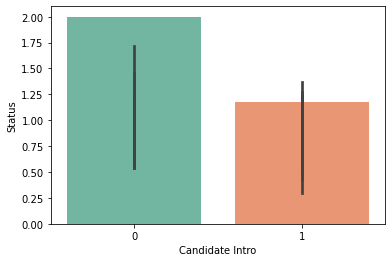

In [35]:
palte=sns.color_palette("Set2")
for i in train.columns:
    sns.barplot(x=i,y="Status",data=train,palette=palte)
plt.show()

In [697]:
test_data

,Interviewer Id,Profile,A.T.T,L.M.I,L.M.C,L.J.T.C,L.J.T.I,N.I.C,N.I.I,S.P.I,S.P.C,Q.A,P.E.I,P.E.C,COMPLIANCE Ratio,Interview duration,Interviewer Intro,Opp to ask,S.L.T.C,S.L.T.I,S.R.T,L.A.I.T,L.A.C.T,Candidate Intro
0,229,5,103,53,77,26.0,287,8,22,69.0,88,4.0,2,0,24.0,49,1,1,31,28,18,11,3,1
1,194,5,54,57,57,179.0,253,62,40,47.0,81,7.0,2,1,99.0,24,0,1,52,7,41,5,1,1
2,266,7,50,117,93,137.0,31,40,52,57.0,13,3.0,0,2,16.0,16,1,1,36,24,22,9,4,0
3,256,3,102,114,66,176.0,242,69,66,59.0,10,6.0,0,1,66.0,40,0,1,31,28,19,2,6,0
4,267,3,96,73,115,218.0,215,69,42,74.0,20,6.0,2,2,47.0,38,0,1,35,24,14,2,6,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,193,4,95,118,79,294.0,110,61,29,30.0,85,7.0,2,0,86.0,49,1,0,39,20,39,12,9,1
1196,233,1,42,47,107,54.0,140,35,33,51.0,76,2.0,2,0,32.0,32,0,0,39,20,34,11,5,1
1197,214,3,72,105,78,247.0,158,30,39,27.0,6,3.0,0,0,34.0,19,1,0,43,16,33,11,1,1
1198,231,2,42,45,68,97.0,327,65,42,88.0,63,7.0,2,0,78.0,23,0,0,57,3,36,5,1,0


In [720]:
from sklearn.model_selection import train_test_split
x_train,X_test,y_train,Y_test=train_test_split(X,y,test_size=0.25,random_state=14)

In [712]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import xgboost as xgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [713]:
dc=DecisionTreeClassifier()
dc.fit(x_train,y_train)
y_predict_dc=dc.predict(X_test)
accuracy_dc=round(dc.score(x_train,y_train)*100,2)
print(accuracy_dc)
dc.score(X_test,Y_test)

100.0


0.8537931034482759

In [707]:
rc2=RandomForestClassifier()
rc2.fit(x_train,y_train)
y_presict_rc2=rc2.predict(X_test)
acc_rc2=round(rc2.score(x_train,y_train)*100,2)
print(acc_rc2)
print(rc2.score(X_test,Y_test))

100.0
0.8937931034482759


In [721]:
#svc
svc=SVC()
svc.fit(x_train,y_train)
y_predict_svc=svc.predict(X_test)
svc.score(x_train,y_train)
accuracy_svc=round(svc.score(x_train,y_train)*100,2)
print(round(svc.score(X_test,Y_test)*100,2))
print(accuracy_svc)

93.45
94.69


In [722]:
xg=XGBClassifier(n_estimators=60,max_depth=3)
xg.fit(x_train,y_train)
y_predict_xg=xg.predict(X_test)
acc_xg=round(xg.score(x_train,y_train)*100,2)
print(acc_xg)
print(xg.score(X_test,Y_test))

99.24
0.9482758620689655


In [734]:
#tune model
from catboost import CatBoostClassifier
cat_boost=CatBoostClassifier(depth=3,random_seed=12)
cat_boost.fit(x_train,y_train)
y_pred=cat_boost.predict(test)

Learning rate set to 0.085288
0:	learn: 1.0197633	total: 5.39ms	remaining: 5.39s
1:	learn: 0.9580006	total: 14.1ms	remaining: 7.05s
2:	learn: 0.8975277	total: 20.7ms	remaining: 6.86s
3:	learn: 0.8477710	total: 25.5ms	remaining: 6.35s
4:	learn: 0.8073773	total: 30.1ms	remaining: 5.99s
5:	learn: 0.7692371	total: 35.2ms	remaining: 5.83s
6:	learn: 0.7415879	total: 39.8ms	remaining: 5.65s
7:	learn: 0.7165313	total: 44.8ms	remaining: 5.55s
8:	learn: 0.6903378	total: 49.8ms	remaining: 5.49s
9:	learn: 0.6663718	total: 54.7ms	remaining: 5.42s
10:	learn: 0.6464900	total: 59.5ms	remaining: 5.35s
11:	learn: 0.6251760	total: 64ms	remaining: 5.26s
12:	learn: 0.6056366	total: 68.9ms	remaining: 5.23s
13:	learn: 0.5903251	total: 73.5ms	remaining: 5.18s
14:	learn: 0.5736357	total: 78.2ms	remaining: 5.13s
15:	learn: 0.5574156	total: 82.8ms	remaining: 5.09s
16:	learn: 0.5448304	total: 87.7ms	remaining: 5.07s
17:	learn: 0.5340504	total: 92.4ms	remaining: 5.04s
18:	learn: 0.5200186	total: 97.3ms	remaining: 

In [735]:
print("train accuracy:",round(cat_boost.score(x_train,y_train)*100,2))
print("test_accuracy:",round(cat_boost.score(X_test,Y_test)*100,2))

train accuracy: 99.93
test_accuracy: 97.59


In [745]:
import keras
import tensorflow as tf
import keras_tuner as kt
from keras.layers import Dense
from tensorflow.keras import layers
from keras.models import Sequential

In [756]:
#sample
model01 = keras.Sequential([
    layers.Input(shape=(24,)),
    layers.Dense(300, activation='relu',kernel_initializer='uniform'),
    layers.BatchNormalization(),
    layers.Dense(200, activation='relu',kernel_initializer='uniform'),
    layers.BatchNormalization(),
    layers.Dense(100, activation='relu',kernel_initializer='uniform'),
    layers.BatchNormalization(),
    layers.Dense(50, activation='relu',kernel_initializer='uniform'),
    layers.BatchNormalization(),
    layers.Dense(25, activation='relu',kernel_initializer='uniform'),
    layers.BatchNormalization(),
    layers.Dense(3, activation='softmax')     
])


In [757]:
model01.compile(optimizer='adam', loss='SparseCategoricalCrossentropy', metrics=['accuracy'])

In [758]:
model01.fit(x_train, y_train, epochs=120,batch_size=32,validation_data=(X_test, Y_test))

Epoch 1/120
136/136 [==============================] - 5s 11ms/step - loss: 0.4115 - accuracy: 0.8237 - val_loss: 0.6552 - val_accuracy: 0.9193
Epoch 2/120
136/136 [==============================] - 1s 8ms/step - loss: 0.2788 - accuracy: 0.8853 - val_loss: 0.2859 - val_accuracy: 0.8869
Epoch 3/120
136/136 [==============================] - 1s 7ms/step - loss: 0.2699 - accuracy: 0.8844 - val_loss: 0.1597 - val_accuracy: 0.9352
Epoch 4/120
136/136 [==============================] - 1s 8ms/step - loss: 0.2434 - accuracy: 0.8947 - val_loss: 0.2592 - val_accuracy: 0.8752
Epoch 5/120
136/136 [==============================] - 1s 8ms/step - loss: 0.2201 - accuracy: 0.9090 - val_loss: 0.2042 - val_accuracy: 0.9179
Epoch 6/120
136/136 [==============================] - 1s 8ms/step - loss: 0.2235 - accuracy: 0.9113 - val_loss: 0.1529 - val_accuracy: 0.9324
Epoch 7/120
136/136 [==============================] - 1s 8ms/step - loss: 0.2270 - accuracy: 0.9044 - val_loss: 0.1080 - val_accuracy: 0.957

In [762]:
predict=model01.predict(test_data)

38/38 [==============================] - 0s 3ms/step


In [771]:
predict

array([[9.9992061e-01, 9.8675155e-06, 6.9497095e-05],
       [5.1670888e-04, 9.9170083e-01, 7.7824155e-03],
       [1.3777539e-04, 9.9865437e-01, 1.2078678e-03],
       ...,
       [5.8473158e-04, 1.0057327e-04, 9.9931467e-01],
       [2.7648336e-03, 9.9723428e-01, 9.0497230e-07],
       [1.5491230e-05, 9.9997592e-01, 8.5881275e-06]], dtype=float32)

In [772]:
pred=np.argmax(predict,axis=1)
pred

array([0, 1, 1, ..., 2, 1, 1], dtype=int64)

In [773]:
#Consider=0,May Consider=1,Not Consider=2
c=[]
for z in pred:
    if z==0:
        c.append("Consider")
    elif z==1:
        c.append("May Consider")
    else:
        c.append("Not Consider")

In [774]:
submission=pd.DataFrame({
    "Interview Id":test['Interview Id'],
    "Status":c
})

In [775]:
submission.to_csv('./submission_04.csv',index=False)

In [776]:
submission

,Interview Id,Status
0,7.021278e+11,Consider
1,6.134906e+11,May Consider
2,7.599988e+11,May Consider
3,3.917601e+11,Not Consider
4,9.415992e+11,Not Consider
...,...,...
1195,2.560337e+11,Not Consider
1196,6.273373e+11,Consider
1197,7.554703e+10,Not Consider
1198,1.739148e+11,May Consider
